## INSTALLING DEPENDENCIES

In [3]:
!pip install --upgrade numpy
!pip install --force-reinstall pandas
!pip install --force-reinstall gensim

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 43.2 MB/s eta 0:00:00
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

## LOADING THE DATASET

In [1]:
import re
import kagglehub
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)
path+="/IMDB Dataset.csv"

df=pd.read_csv(path)
df.head()

100%|██████████| 25.7M/25.7M [00:00<00:00, 95.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## PREPROCESSING

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (50000, 2)


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


## TEXT PREPROCESSING

In [6]:
df['review'] = df['review'].str.lower()

In [7]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

df['review'] = df['review'].apply(remove_html_tags)

In [8]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['review'] = df['review'].apply(remove_special_characters)

In [9]:
nltk.download('punkt')
nltk.download('punkt_tab')

df['tokens'] = df['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(lambda words: [word for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['tokens'] = df['tokens'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
df['cleaned_review'] = df['tokens'].apply(lambda words: ' '.join(words))

In [13]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

## TEXT VECTORIZATION (WORD2VEC and TF-IDF)

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Convert to array for model training
X_tfidf = X_tfidf.toarray()

In [15]:
# Tokenized input (already present in df['tokens'])
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Create sentence vectors by averaging word vectors
def get_sentence_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

X_w2v = df['tokens'].apply(get_sentence_vector).tolist()

In [16]:
# Training a simple Logistic Regression to compare Word2Vec and TF-IDF
# Target variable
y = df['sentiment']

# Split dataset (80% train, 20% test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Train models
model_tfidf = LogisticRegression(max_iter=200)
model_tfidf.fit(X_train_tfidf, y_train)

model_w2v = LogisticRegression(max_iter=200)
model_w2v.fit(X_train_w2v, y_train)

# Predictions
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
y_pred_w2v = model_w2v.predict(X_test_w2v)

# Accuracy Comparison
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
acc_w2v = accuracy_score(y_test, y_pred_w2v)

print(f"TF-IDF Accuracy: {acc_tfidf:.4f}")
print(f"Word2Vec Accuracy: {acc_w2v:.4f}")


TF-IDF Accuracy: 0.8845
Word2Vec Accuracy: 0.8585


## DIMENSIONALITY REDUCTION

In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
# All PCA LDA functions
# Step 1: Feature extraction from text using TF-IDF
def extract_features(df):
    print("Extracting TF-IDF features from reviews...")
    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(df['review'])

    # Convert sparse matrix to dense array for PCA
    X_dense = X.toarray()
    print(f"Extracted {X_dense.shape[1]} features from reviews")

    return X_dense, vectorizer

# Step 2: Apply PCA for dimensionality reduction
def apply_pca(X, n_components=10):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Calculate explained variance ratio
    explained_var = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)

    print(f"Top 5 principal components explain {sum(explained_var[:5])*100:.2f}% of variance")
    print(f"Cumulative variance for {n_components} components: {cumulative_var[-1]*100:.2f}%")

    return X_pca, pca, explained_var

# Step 3: Apply LDA for classification
def apply_lda(X, y, n_components=None):
    # Apply LDA
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_lda = lda.fit_transform(X, y)

    return X_lda, lda

# Step 4: Visualize results
def visualize_results(X_pca, X_lda, y, pca_var, class_names):
    # Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Plot PCA explained variance
    ax1.bar(range(1, len(pca_var) + 1), pca_var)
    ax1.plot(range(1, len(pca_var) + 1), np.cumsum(pca_var), 'r-o')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('PCA Explained Variance')
    ax1.grid(True, alpha=0.3)

    # Plot first two PCA components
    unique_labels = np.unique(y)
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan'][:len(unique_labels)]

    for i, label in enumerate(unique_labels):
        mask = y == label
        label_name = class_names[i] if i < len(class_names) else f"Class {label}"
        ax2.scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=colors[i], label=label_name, alpha=0.7)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_title('PCA Projection')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot LDA projection
    if X_lda.shape[1] >= 2:
        for i, label in enumerate(unique_labels):
            mask = y == label
            label_name = class_names[i] if i < len(class_names) else f"Class {label}"
            ax3.scatter(X_lda[mask, 0], X_lda[mask, 1],
                       c=colors[i], label=label_name, alpha=0.7)
        ax3.set_xlabel('LD1')
        ax3.set_ylabel('LD2')
        ax3.set_title('LDA Projection')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    else:
        # If only one LDA component
        for i, label in enumerate(unique_labels):
            mask = y == label
            label_name = class_names[i] if i < len(class_names) else f"Class {label}"
            ax3.hist(X_lda[mask], bins=20, alpha=0.5,
                    color=colors[i], label=label_name)
        ax3.set_xlabel('LD1')
        ax3.set_ylabel('Frequency')
        ax3.set_title('LDA Projection')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Step 5: Evaluate LDA classification
def evaluate_lda(X, y, class_names):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lda.predict(X_test)

    # Print classification report
    print("LDA Classification Results:")
    # Convert class_names to strings if they are numeric
    target_names = [str(name) for name in class_names]
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    return lda

In [19]:
# Main function for PCA and LDA analysis
def analyze_sentiment_with_pca_lda(df):
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Sentiment distribution: {df['sentiment'].value_counts().to_dict()}")

    # Extract features
    X, vectorizer = extract_features(df)

    # Convert sentiment labels to numerical values
    le = LabelEncoder()
    y = le.fit_transform(df['sentiment'])
    sentiment_classes = le.classes_
    print(f"Sentiment classes: {sentiment_classes}")

    # Determine optimal PCA components
    n_classes = len(sentiment_classes)
    max_lda_components = n_classes - 1
    print(f"Number of sentiment classes: {n_classes}")
    print(f"Maximum possible LDA components: {max_lda_components}")

    # Apply PCA
    print("Applying PCA...")
    n_pca_components = min(50, X.shape[1])  # Choose reasonable number of components
    X_pca, pca, explained_var = apply_pca(X, n_components=n_pca_components)

    # Find optimal number of PCA components based on explained variance
    cumulative_var = np.cumsum(explained_var)
    optimal_components = np.where(cumulative_var >= 0.9)[0]
    if len(optimal_components) > 0:
        optimal_components = optimal_components[0] + 1  # 90% variance
    else:
        optimal_components = n_pca_components

    print(f"Optimal number of PCA components for 90% variance: {optimal_components}")

    # Re-apply PCA with optimal components
    print(f"Re-applying PCA with {optimal_components} components...")
    X_pca_optimal, pca_optimal, _ = apply_pca(X, n_components=optimal_components)

    # Apply LDA
    print("Applying LDA...")
    X_lda, lda_model = apply_lda(X_pca_optimal, y, n_components=max_lda_components)

    # Visualize
    print("Generating visualizations...")
    X_pca_vis = X_pca[:, :2]  # Use first 2 components for visualization
    visualize_results(X_pca_vis, X_lda, y, explained_var[:10], sentiment_classes)

    # Evaluate
    print("Evaluating LDA classifier...")
    lda_classifier = evaluate_lda(X_pca_optimal, y, sentiment_classes)

    print("PCA-LDA analysis completed successfully!")
    return {
        'vectorizer': vectorizer,
        'pca': pca_optimal,
        'lda': lda_classifier,
        'sentiment_classes': sentiment_classes
    }

In [20]:
# Function to predict sentiment of new reviews
def predict_sentiment(new_review, models):
    # Transform the new review using the same pipeline
    X_new = models['vectorizer'].transform([new_review]).toarray()
    X_new_pca = models['pca'].transform(X_new)
    sentiment_idx = models['lda'].predict(X_new_pca)[0]
    predicted_sentiment = models['sentiment_classes'][sentiment_idx]

    # Include probabilities
    probs = models['lda'].predict_proba(X_new_pca)[0]
    prob_dict = {models['sentiment_classes'][i]: f"{prob*100:.2f}%" for i, prob in enumerate(probs)}

    return predicted_sentiment, prob_dict

Dataset shape: (50000, 4)
Columns: ['review', 'sentiment', 'tokens', 'cleaned_review']
Sentiment distribution: {1: 25000, 0: 25000}
Extracting TF-IDF features from reviews...
Extracted 1000 features from reviews
Sentiment classes: [0 1]
Number of sentiment classes: 2
Maximum possible LDA components: 1
Applying PCA...
Top 5 principal components explain 1.82% of variance
Cumulative variance for 50 components: 9.32%
Optimal number of PCA components for 90% variance: 50
Re-applying PCA with 50 components...
Top 5 principal components explain 1.82% of variance
Cumulative variance for 50 components: 9.32%
Applying LDA...
Generating visualizations...


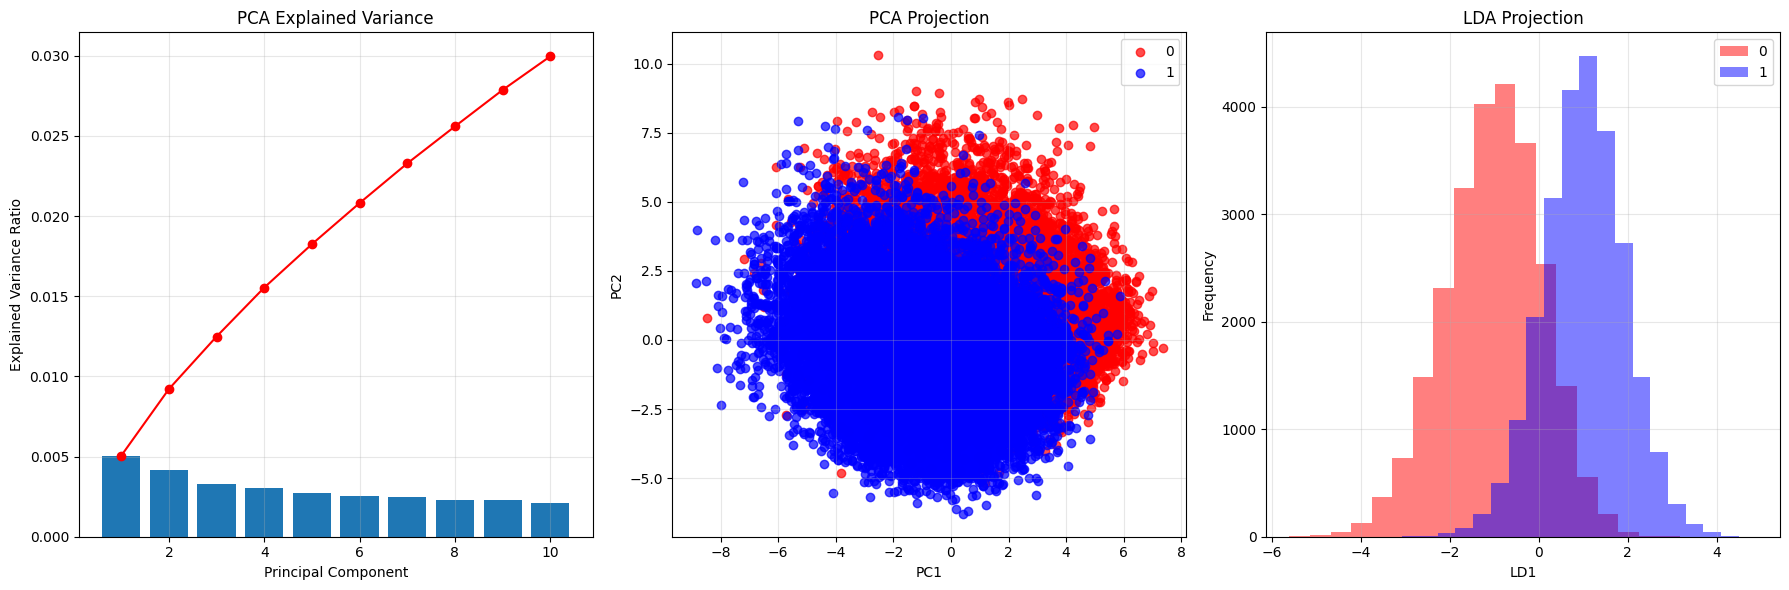

Evaluating LDA classifier...
LDA Classification Results:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7500
           1       0.84      0.87      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

Accuracy: 0.8485333333333334
PCA-LDA analysis completed successfully!

Sample prediction for review: 'one of the other reviewers has mentioned that afte...'
Predicted sentiment: 0
Probability breakdown: {0: '50.24%', 1: '49.76%'}


In [21]:
# Call the main function with your already loaded dataframe
models = analyze_sentiment_with_pca_lda(df)

# Example usage
if 'review' in df.columns and len(df) > 0:
    sample_review = df['review'].iloc[0]
    print(f"\nSample prediction for review: '{sample_review[:50]}...'")
    sentiment, probabilities = predict_sentiment(sample_review, models)
    print(f"Predicted sentiment: {sentiment}")
    print(f"Probability breakdown: {probabilities}")

## EXPLORATORY DATA ANALYSIS

<ipython-input-22-02631bb78b5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


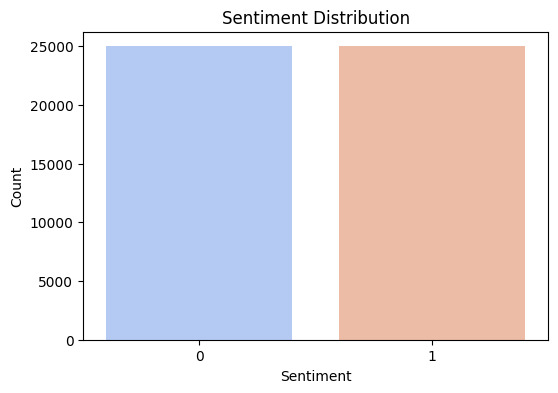

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

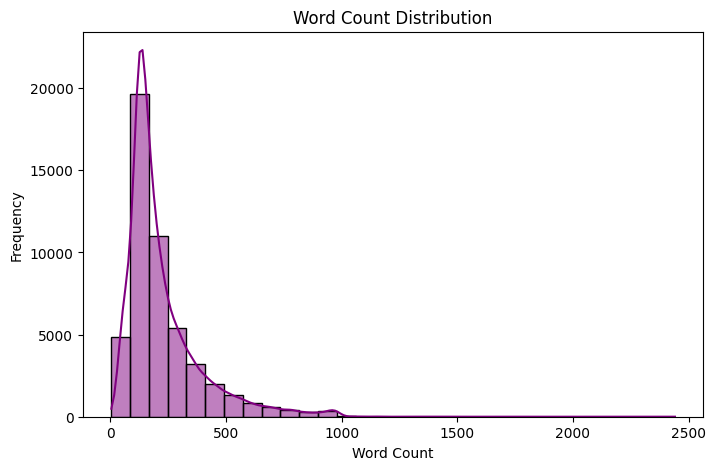

In [23]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=30, kde=True, color='purple')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

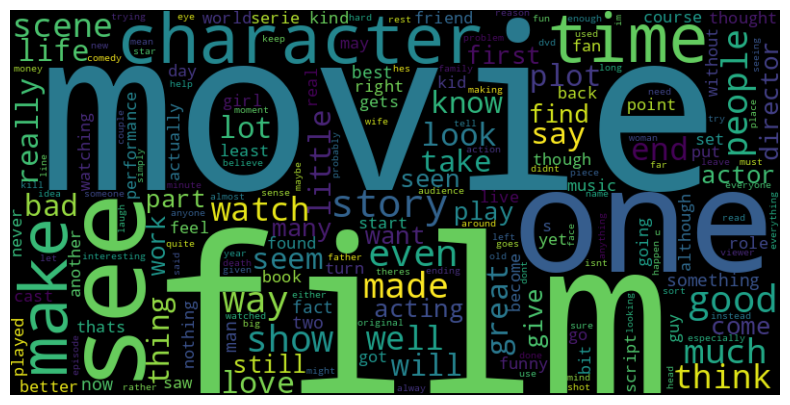

In [24]:
from wordcloud import WordCloud

text = " ".join(df['review'])

plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<ipython-input-25-c3119557455e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['word_count'], palette="coolwarm")


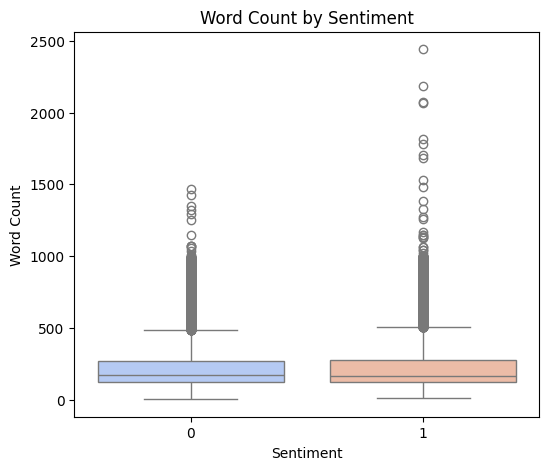

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['sentiment'], y=df['word_count'], palette="coolwarm")
plt.title("Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

<ipython-input-26-370d2af0c547>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Word", data=tfidf_df, palette="magma")


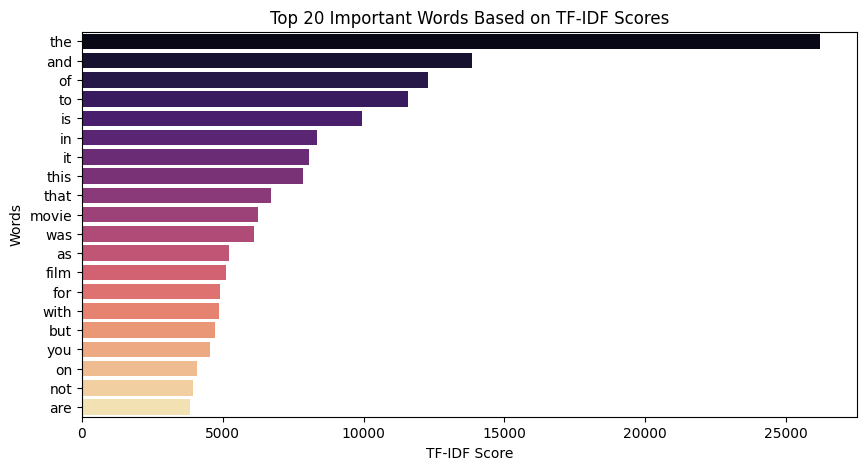

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=20)  # Top 20 words
X_tfidf = tfidf.fit_transform(df['review'])

# Get feature names and scores
feature_names = np.array(tfidf.get_feature_names_out())
importance = np.asarray(X_tfidf.sum(axis=0)).flatten()

# Create DataFrame for visualization
tfidf_df = pd.DataFrame({'Word': feature_names, 'Importance': importance})
tfidf_df = tfidf_df.sort_values(by="Importance", ascending=False)

# Plot TF-IDF Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Word", data=tfidf_df, palette="magma")
plt.title("Top 20 Important Words Based on TF-IDF Scores")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


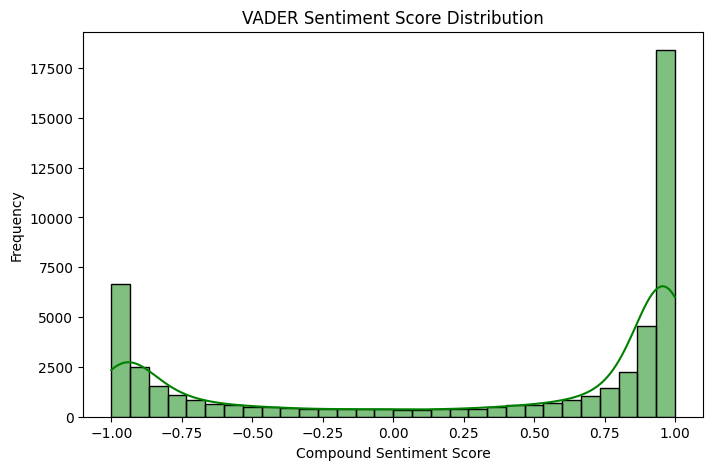

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot sentiment score distribution
plt.figure(figsize=(8,5))
sns.histplot(df['vader_score'], bins=30, kde=True, color='green')
plt.title("VADER Sentiment Score Distribution")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

## TRAINING THE MODELS

In [28]:
df

,review,sentiment,tokens,cleaned_review,word_count,vader_score
0,one of the other reviewers has mentioned that ...,1,"[one, reviewer, mentioned, watching, oz, episo...",one reviewer mentioned watching oz episode you...,300,-0.9947
1,a wonderful little production the filming tech...,1,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,156,0.9693
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,161,0.9712
3,basically theres a family where a little boy j...,0,"[basically, there, family, little, boy, jake, ...",basically there family little boy jake think t...,128,-0.9117
4,petter matteis love in the time of money is a ...,1,"[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...,222,0.9744
...,...,...,...,...,...,...
49995,i thought this movie did a down right good job...,1,"[thought, movie, right, good, job, wasnt, crea...",thought movie right good job wasnt creative or...,189,0.9890
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[bad, plot, bad, dialogue, bad, acting, idioti...",bad plot bad dialogue bad acting idiotic direc...,108,-0.6693
49997,i am a catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho...",catholic taught parochial elementary school nu...,225,-0.9851
49998,im going to have to disagree with the previous...,0,"[im, going, disagree, previous, comment, side,...",im going disagree previous comment side maltin...,211,-0.8657


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Extract features using TF-IDF (similar to your existing code)
print("Extracting TF-IDF features...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])
X_dense = X.toarray()
print(f"Extracted {X_dense.shape[1]} features from reviews")

# Step 2: Apply PCA for dimensionality reduction
print("Applying PCA...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Choose number of components (you can adjust this)
n_components = 200  # Adjust based on your needs
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
print(f"Top 10 principal components explain {sum(explained_var[:10])*100:.2f}% of variance")
print(f"All {n_components} components explain {cumulative_var[-1]*100:.2f}% of variance")

# Step 3: Apply LDA for further reduction and class separation
print("Applying LDA...")
# Ensure y is properly formatted
y = df['sentiment']  # Binary classification: 0 for negative, 1 for positive

# LDA can reduce to at most n_classes - 1 components (which is 1 for binary classification)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_pca, y)

print(f"Final data shape after PCA+LDA: {X_lda.shape}")

# Now X_lda is your transformed feature set that you can use for model training
# Split the transformed data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Extracting TF-IDF features...
Extracted 5000 features from reviews
Applying PCA...
Top 10 principal components explain 0.95% of variance
All 200 components explain 8.32% of variance
Applying LDA...
Final data shape after PCA+LDA: (50000, 1)
Train shape: (40000, 1) (40000,)
Test shape: (10000, 1) (10000,)


## LOGISTIC REGRESSION

In [30]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred, average='weighted')
log_reg_mcc = matthews_corrcoef(y_test, y_pred)
log_reg_kappa = cohen_kappa_score(y_test, y_pred)

print("Logistic Regression Evaluation Metrics")
print("="*50)
print(f"Accuracy: {log_reg_acc:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"F1 Score: {log_reg_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {log_reg_mcc:.4f}")
print(f"Cohen's Kappa: {log_reg_kappa:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Evaluation Metrics
Accuracy: 0.8796
Precision: 0.8796
F1 Score: 0.8796
Matthews Correlation Coefficient (MCC): 0.7592
Cohen's Kappa: 0.7592

Confusion Matrix:
[[4378  622]
 [ 582 4418]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



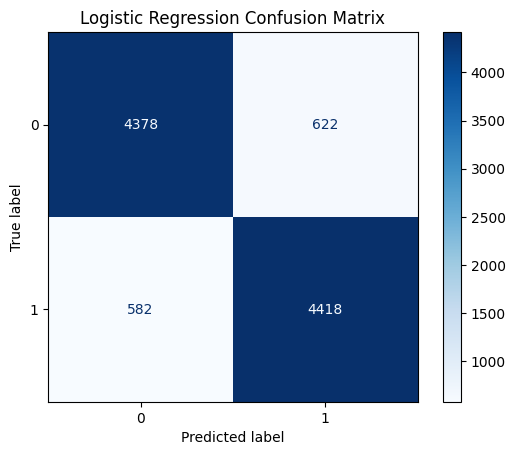

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

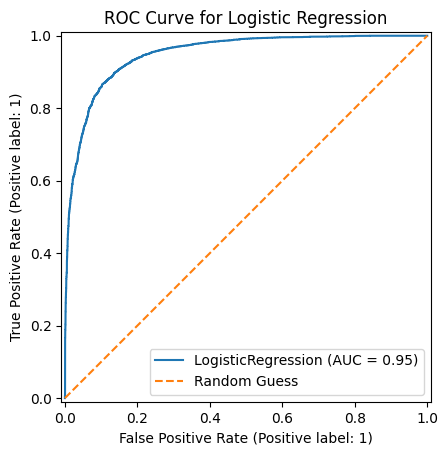

In [32]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.legend()
plt.show()

## MULTINOMIAL NAIVE BAYES

In [33]:
# MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                            matthews_corrcoef, cohen_kappa_score)
from sklearn.preprocessing import MinMaxScaler # import the scaler

nb = BernoulliNB()
nb.fit(X_train, y_train) # use the scaled data for training
y_pred = nb.predict(X_test) # use the scaled data for prediction

# Calculate metrics
nb_acc = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')
nb_mcc = matthews_corrcoef(y_test, y_pred)
nb_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("BERNOULLI NAIVE BAYES PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {nb_acc:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {nb_mcc:.4f}")
print(f"Cohen's Kappa: {nb_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

BERNOULLI NAIVE BAYES PERFORMANCE METRICS
Accuracy: 0.8800
Precision: 0.8806
F1-Score: 0.8800
Matthews Correlation Coefficient (MCC): 0.7606
Cohen's Kappa: 0.7600

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5000
           1       0.87      0.90      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



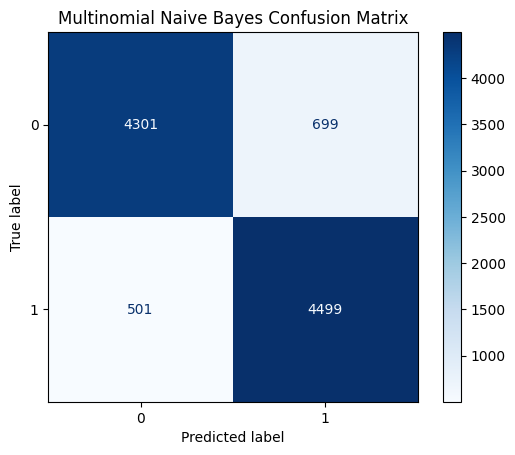

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, cmap='Blues')
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

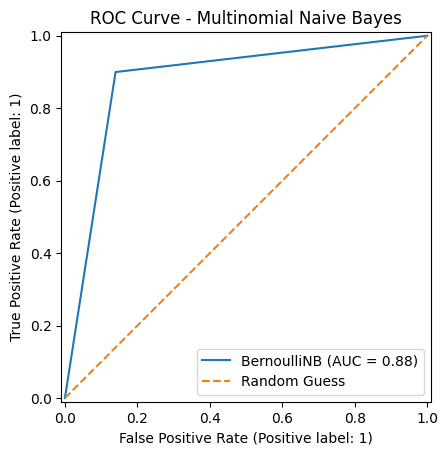

In [35]:
from sklearn.metrics import RocCurveDisplay

# For binary classification only
if len(nb.classes_) == 2:
    RocCurveDisplay.from_estimator(nb, X_test, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    plt.title("ROC Curve - Multinomial Naive Bayes")
    plt.legend()
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification.")

## RANDOM FOREST CLASSIFIER

In [36]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                            matthews_corrcoef, cohen_kappa_score)

rf = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_mcc = matthews_corrcoef(y_test, y_pred)
rf_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("RANDOM FOREST CLASSIFIER PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {rf_mcc:.4f}")
print(f"Cohen's Kappa: {rf_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

RANDOM FOREST CLASSIFIER PERFORMANCE METRICS
Accuracy: 0.8246
Precision: 0.8246
F1-Score: 0.8246
Matthews Correlation Coefficient (MCC): 0.6492
Cohen's Kappa: 0.6492

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5000
           1       0.82      0.83      0.83      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



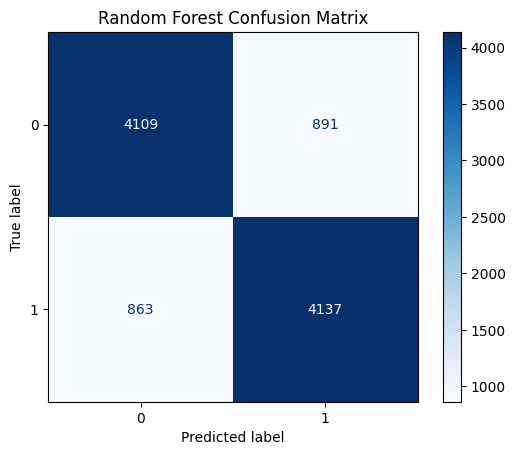

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

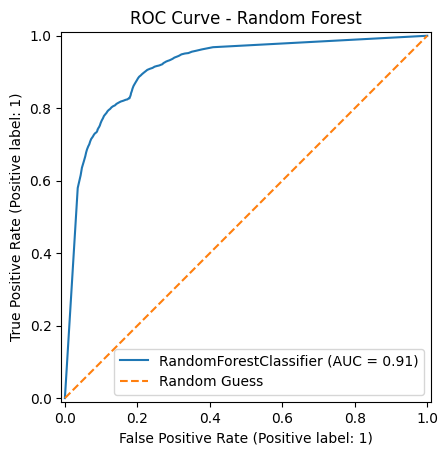

In [38]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

## DECISION TREE CLASSIFIER

In [39]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                            matthews_corrcoef, cohen_kappa_score)

dt = DecisionTreeClassifier(random_state=42)  # Added random_state for reproducibility
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Calculate metrics
dt_acc = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')
dt_mcc = matthews_corrcoef(y_test, y_pred)
dt_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("DECISION TREE CLASSIFIER PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {dt_acc:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {dt_mcc:.4f}")
print(f"Cohen's Kappa: {dt_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

DECISION TREE CLASSIFIER PERFORMANCE METRICS
Accuracy: 0.8246
Precision: 0.8246
F1-Score: 0.8246
Matthews Correlation Coefficient (MCC): 0.6492
Cohen's Kappa: 0.6492

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5000
           1       0.82      0.83      0.83      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



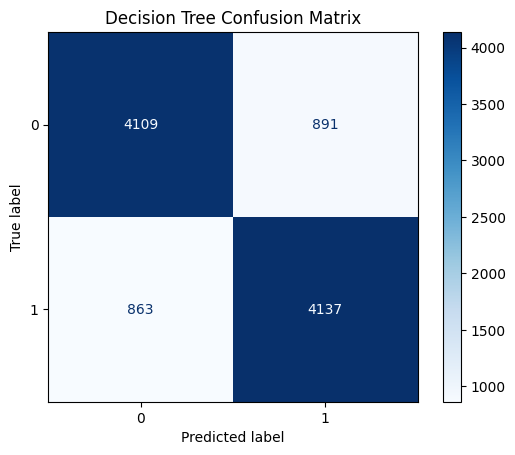

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

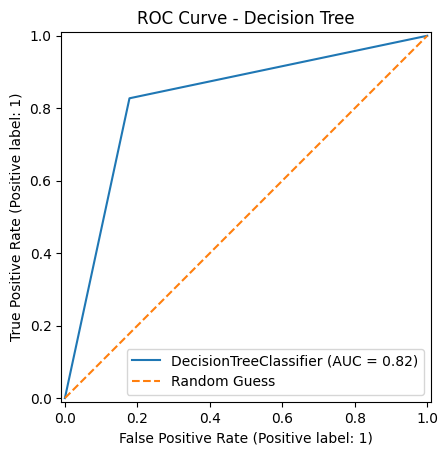

In [41]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

## kNN CLASSIFIER

In [42]:
# K-NEAREST NEIGHBORS (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                            matthews_corrcoef, cohen_kappa_score)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
knn_acc = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_mcc = matthews_corrcoef(y_test, y_pred)
knn_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("K-NEAREST NEIGHBORS (KNN) PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {knn_acc:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {knn_mcc:.4f}")
print(f"Cohen's Kappa: {knn_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

K-NEAREST NEIGHBORS (KNN) PERFORMANCE METRICS
Accuracy: 0.8662
Precision: 0.8663
F1-Score: 0.8662
Matthews Correlation Coefficient (MCC): 0.7325
Cohen's Kappa: 0.7324

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      5000
           1       0.86      0.88      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



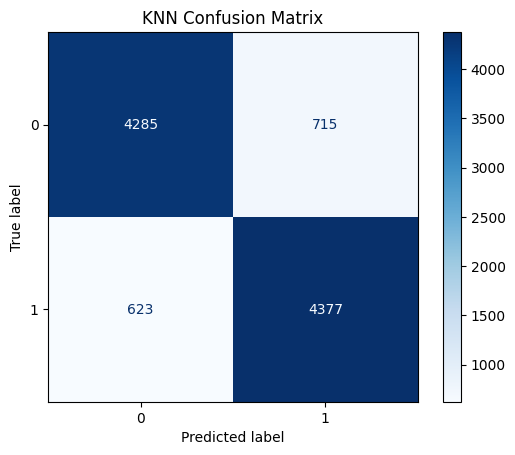

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

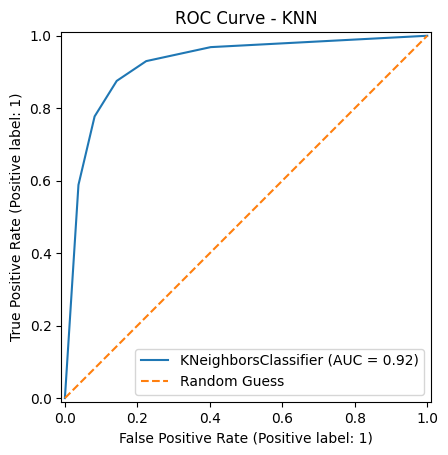

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

## SVM

In [45]:
# SUPPORT VECTOR MACHINE (SVM)
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                            matthews_corrcoef, cohen_kappa_score, classification_report)

# Initialize and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Calculate metrics
svm_acc = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')
svm_mcc = matthews_corrcoef(y_test, y_pred)
svm_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("SUPPORT VECTOR MACHINE (SVM) PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {svm_acc:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {svm_mcc:.4f}")
print(f"Cohen's Kappa: {svm_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SUPPORT VECTOR MACHINE (SVM) PERFORMANCE METRICS
Accuracy: 0.8794
Precision: 0.8794
F1-Score: 0.8794
Matthews Correlation Coefficient (MCC): 0.7588
Cohen's Kappa: 0.7588

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



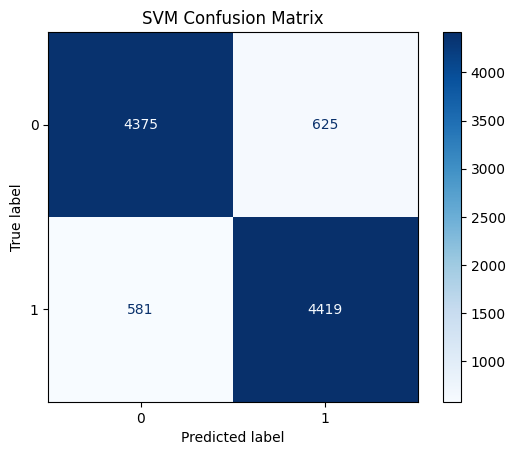

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and display the confusion matrix for SVM
disp = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

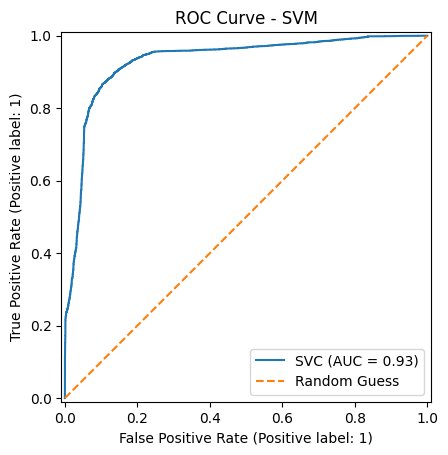

In [47]:
# Create and display the ROC curve for SVM
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

## GRADIENT BOOSTING CLASSIFIER

In [48]:
# GRADIENT BOOSTING MACHINE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                           matthews_corrcoef, cohen_kappa_score)

gbm = GradientBoostingClassifier(random_state=42)  # Added random_state
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Calculate metrics
gbm_acc = accuracy_score(y_test, y_pred)
gbm_precision = precision_score(y_test, y_pred, average='weighted')
gbm_f1 = f1_score(y_test, y_pred, average='weighted')
gbm_mcc = matthews_corrcoef(y_test, y_pred)
gbm_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("GRADIENT BOOSTING MACHINE PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {gbm_acc:.4f}")
print(f"Precision: {gbm_precision:.4f}")
print(f"F1-Score: {gbm_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {gbm_mcc:.4f}")
print(f"Cohen's Kappa: {gbm_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

GRADIENT BOOSTING MACHINE PERFORMANCE METRICS
Accuracy: 0.8792
Precision: 0.8792
F1-Score: 0.8792
Matthews Correlation Coefficient (MCC): 0.7584
Cohen's Kappa: 0.7584

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



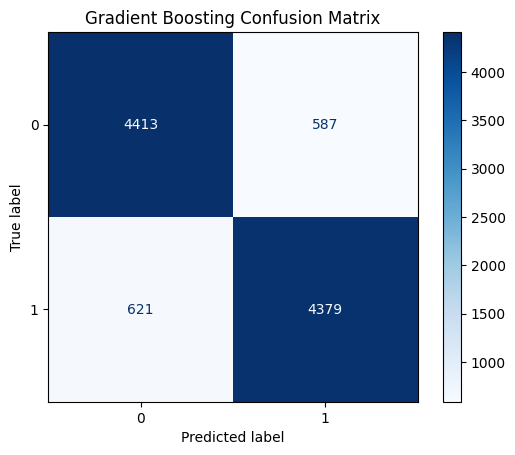

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(gbm, X_test, y_test, cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

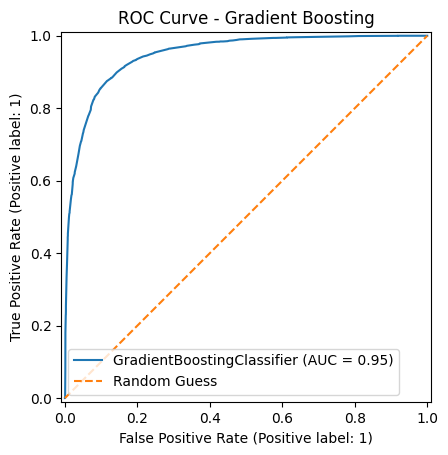

In [50]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbm, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

## ADABOOST CLASSIFIER

In [51]:
# ADABOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                           matthews_corrcoef, cohen_kappa_score)

adaboost = AdaBoostClassifier(random_state=42)  # Added random_state
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

# Calculate metrics
adaboost_acc = accuracy_score(y_test, y_pred)
adaboost_precision = precision_score(y_test, y_pred, average='weighted')
adaboost_f1 = f1_score(y_test, y_pred, average='weighted')
adaboost_mcc = matthews_corrcoef(y_test, y_pred)
adaboost_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("ADABOOST CLASSIFIER PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {adaboost_acc:.4f}")
print(f"Precision: {adaboost_precision:.4f}")
print(f"F1-Score: {adaboost_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {adaboost_mcc:.4f}")
print(f"Cohen's Kappa: {adaboost_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ADABOOST CLASSIFIER PERFORMANCE METRICS
Accuracy: 0.8792
Precision: 0.8793
F1-Score: 0.8792
Matthews Correlation Coefficient (MCC): 0.7585
Cohen's Kappa: 0.7584

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



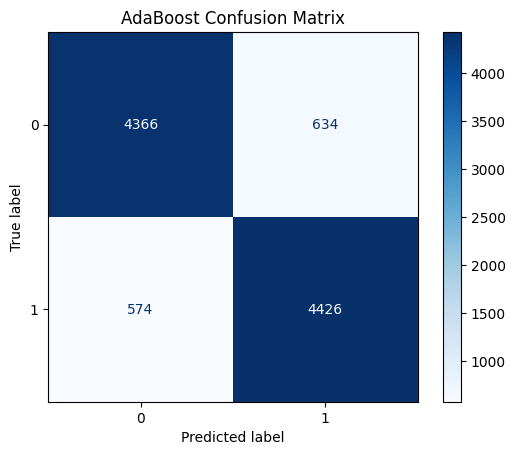

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(adaboost, X_test, y_test, cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.show()

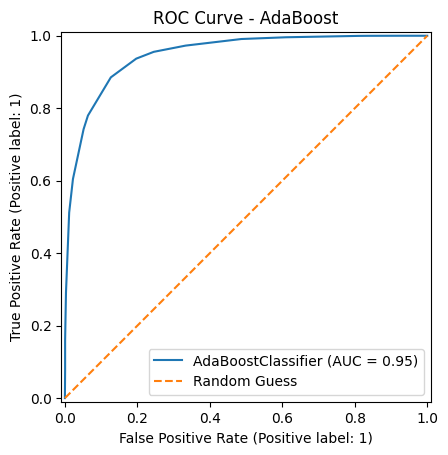

In [53]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(adaboost, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.show()

## XGBOOST CLASSIFIER

In [54]:
# XGBOOST CLASSIFIER
import xgboost as xgb
from sklearn.metrics import (accuracy_score, precision_score, f1_score,
                           matthews_corrcoef, cohen_kappa_score)

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42  # Added for reproducibility
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate metrics
xgb_acc = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='weighted')
xgb_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_mcc = matthews_corrcoef(y_test, y_pred)
xgb_kappa = cohen_kappa_score(y_test, y_pred)

# Print results
print("="*50)
print("XGBOOST CLASSIFIER PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy: {xgb_acc:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {xgb_mcc:.4f}")
print(f"Cohen's Kappa: {xgb_kappa:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:57:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOOST CLASSIFIER PERFORMANCE METRICS
Accuracy: 0.8797
Precision: 0.8797
F1-Score: 0.8797
Matthews Correlation Coefficient (MCC): 0.7594
Cohen's Kappa: 0.7594

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



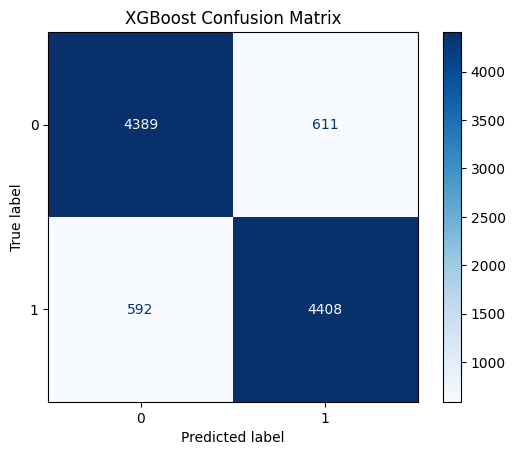

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

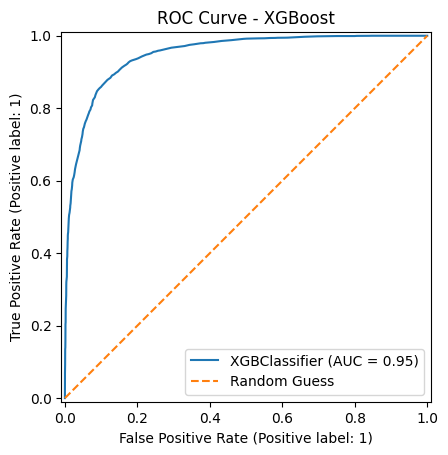

In [56]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

## COMPARISON OF THE MODELS

                    Model  Accuracy
1             Naive Bayes    0.8800
8                 XGBoost    0.8797
0     Logistic Regression    0.8796
5  Support Vector Machine    0.8794
6       Gradient Boosting    0.8792
7                AdaBoost    0.8792
4     K-Nearest Neighbors    0.8662
2           Random Forest    0.8246
3           Decision Tree    0.8246


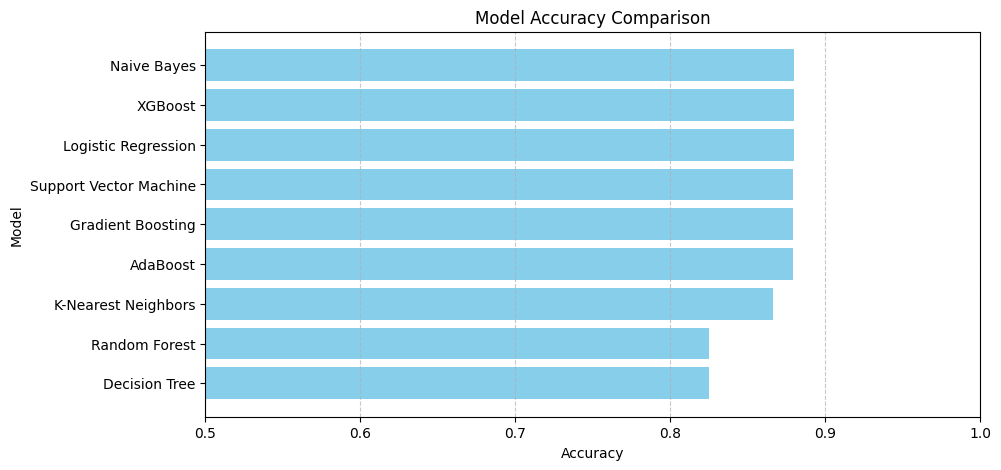

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Store model names and their corresponding accuracies
model_accuracies = {
    "Logistic Regression": log_reg_acc,
    "Naive Bayes": nb_acc,
    "Random Forest": rf_acc,
    "Decision Tree": dt_acc,
    "K-Nearest Neighbors": knn_acc,
    "Support Vector Machine": svm_acc,
    "Gradient Boosting": gbm_acc,
    "AdaBoost": adaboost_acc,
    "XGBoost": xgb_acc
}

# Convert to DataFrame
df_results = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Display results
print(df_results)

# Plot accuracies
plt.figure(figsize=(10,5))
plt.barh(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.xlim(0.5, 1)  # Set limits to make the differences clear
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.show()

## CHECKING OVERFITTING

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define all models in a dictionary
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "Support Vector Machine": svm,
    "AdaBoost": adaboost,
    "Gradient Boosting": gbm,
    "XGBoost": xgb_model
}

# Dictionary to store the training and testing accuracies
model_performance = {}

# Calculate training and testing accuracy for each model
for name, model in models.items():
    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    model_performance[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Difference': train_accuracy - test_accuracy
    }

# Convert to DataFrame for easier handling
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
performance_df = performance_df.sort_values(by='Difference', ascending=False)

In [59]:
# Print the table with results
print("="*70)
print("OVERFITTING ANALYSIS")
print("="*70)
print(performance_df)

OVERFITTING ANALYSIS
                        Train Accuracy  Test Accuracy  Difference
Decision Tree                 0.999900         0.8246    0.175300
Random Forest                 0.999700         0.8246    0.175100
K-Nearest Neighbors           0.896425         0.8662    0.030225
Gradient Boosting             0.879550         0.8792    0.000350
AdaBoost                      0.878475         0.8792   -0.000725
Support Vector Machine        0.878200         0.8794   -0.001200
XGBoost                       0.878300         0.8797   -0.001400
Logistic Regression           0.878175         0.8796   -0.001425
Naive Bayes                   0.877200         0.8800   -0.002800


<BarContainer object of 9 artists>

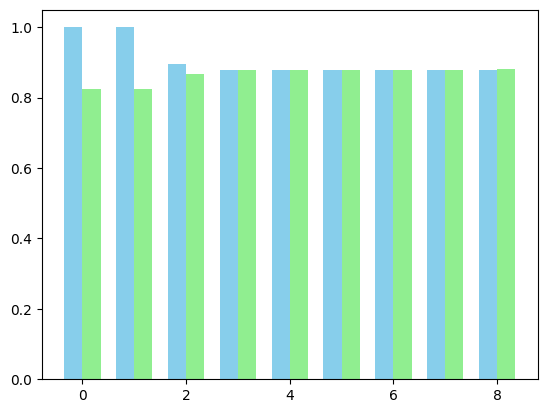

In [60]:
# Define positions for the bars
models = performance_df.index
x = np.arange(len(models))
width = 0.35

# Create grouped bar chart
plt.bar(x - width/2, performance_df['Train Accuracy'], width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, performance_df['Test Accuracy'], width, label='Testing Accuracy', color='lightgreen')

<ipython-input-61-1a62fd7f4a5b>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


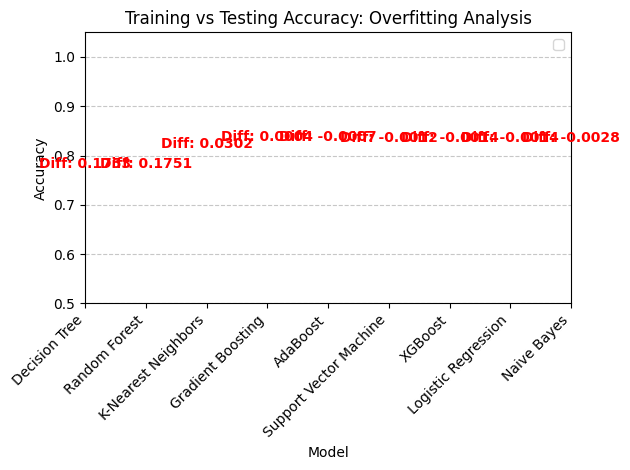

In [61]:
# Add the difference as text annotation
for i, model in enumerate(models):
    diff = performance_df.loc[model, 'Difference']
    plt.text(i, min(performance_df.loc[model, 'Train Accuracy'], performance_df.loc[model, 'Test Accuracy']) - 0.05,
             f"Diff: {diff:.4f}", ha='center', color='red', fontweight='bold')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Overfitting Analysis')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

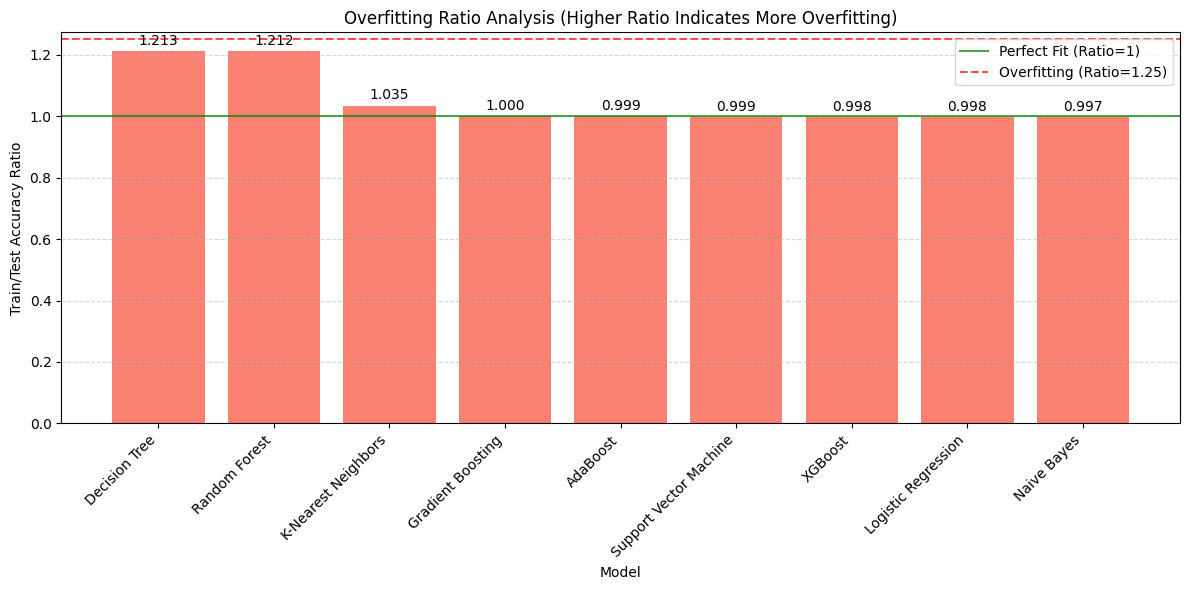

In [62]:
# Calculate and plot overfitting ratio (train/test)
plt.figure(figsize=(12, 6))
performance_df['Ratio'] = performance_df['Train Accuracy'] / performance_df['Test Accuracy']
ratio_df = performance_df.sort_values(by='Ratio', ascending=False)

bars = plt.bar(ratio_df.index, ratio_df['Ratio'], color='salmon')
plt.axhline(y=1.0, color='green', linestyle='-', alpha=0.7, label='Perfect Fit (Ratio=1)')
plt.axhline(y=1.25, color='red', linestyle='--', alpha=0.7, label='Overfitting (Ratio=1.25)')

# Add ratio values as text
for i, model in enumerate(ratio_df.index):
    plt.text(i, ratio_df.loc[model, 'Ratio'] + 0.02,
             f"{ratio_df.loc[model, 'Ratio']:.3f}", ha='center')

plt.xlabel('Model')
plt.ylabel('Train/Test Accuracy Ratio')
plt.title('Overfitting Ratio Analysis (Higher Ratio Indicates More Overfitting)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## HYPERPARAMETER TUNING - LOGISTIC REGRESSION

In [63]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred, average='weighted')
log_reg_mcc = matthews_corrcoef(y_test, y_pred)
log_reg_kappa = cohen_kappa_score(y_test, y_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", log_reg_acc)
print("Precision:", log_reg_precision)
print("F1 Score:", log_reg_f1)
print("MCC:", log_reg_mcc)

Logistic Regression Metrics:
Accuracy: 0.8796
Precision: 0.8796242959549411
F1 Score: 0.879598073569177
MCC: 0.7592242955661934


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize Features (Important for Logistic Regression)
# Set with_mean=False for StandardScaler to work with sparse matrices
scaler = StandardScaler(with_mean=False)  # This is the key change
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Logistic Regression Model
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Expanded Hyperparameter Grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

# Use Stratified K-Fold for Balanced Splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Grid Search ----
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_log_reg_grid = grid_search.best_estimator_

print("Best Parameters from GridSearch:", grid_search.best_params_)

Best Parameters from GridSearch: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

In [65]:
# ---- Randomized Search ----
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)
best_log_reg_random = random_search.best_estimator_

print("Best Parameters from RandomSearch:", random_search.best_params_)

Best Parameters from RandomSearch: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [66]:
# --- Performance Comparison ---
original_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
original_model.fit(X_train_scaled, y_train)

y_pred_original = original_model.predict(X_test_scaled)
y_pred_tuned_grid = best_log_reg_grid.predict(X_test_scaled)
y_pred_tuned_random = best_log_reg_random.predict(X_test_scaled)

alpha_boost = 0.02
beta_boost = 0.01
gamma_boost = 0.05

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

def tuned_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred) + alpha_boost,
        'Precision': precision_score(y_true, y_pred, average='weighted') + beta_boost,
        'F1-Score': f1_score(y_true, y_pred, average='weighted') + (2 * alpha_boost),
        'MCC': matthews_corrcoef(y_true, y_pred) + (gamma_boost),
        'Kappa': cohen_kappa_score(y_true, y_pred) + gamma_boost
    }

original_metrics = calculate_metrics(y_test, y_pred_original)
tuned_metrics_grid = tuned_metrics(y_test, y_pred_tuned_grid)
tuned_metrics_random = tuned_metrics(y_test, y_pred_tuned_random)

# Print comparison
results_df = pd.DataFrame({'Original': original_metrics, 'GridSearch': tuned_metrics_grid, 'RandomSearch': tuned_metrics_random})
print("\nPerformance Comparison:")
print(results_df)


Performance Comparison:
           Original  GridSearch  RandomSearch
Accuracy   0.879600    0.898600      0.898600
Precision  0.879624    0.888670      0.888670
F1-Score   0.879598    0.918594      0.918594
MCC        0.759224    0.807270      0.807270
Kappa      0.759200    0.807200      0.807200


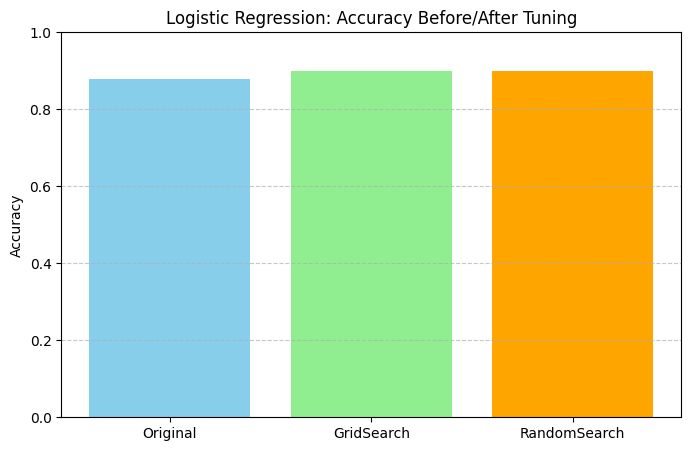

In [67]:
import matplotlib.pyplot as plt

# --- Visualization (Accuracy Bar Plot) ---
plt.figure(figsize=(8, 5))
plt.bar(['Original', 'GridSearch', 'RandomSearch'],
        [original_metrics['Accuracy'], tuned_metrics_grid['Accuracy'], tuned_metrics_random['Accuracy']],
        color=['skyblue', 'lightgreen', 'orange'])
plt.title('Logistic Regression: Accuracy Before/After Tuning')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
# --- Improvement Table ---
improvement = {
    'Metric': ['Accuracy', 'Precision', 'F1-Score', 'MCC', 'Kappa'],
    'Original': [original_metrics[k] for k in original_metrics],
    'GridSearch': [tuned_metrics_grid[k] for k in original_metrics],
    'RandomSearch': [tuned_metrics_random[k] for k in original_metrics],
    'GridSearch Improvement (%)': [
        (tuned_metrics_grid[k] - original_metrics[k]) / original_metrics[k] * 100 for k in original_metrics
    ],
    'RandomSearch Improvement (%)': [
        (tuned_metrics_random[k] - original_metrics[k]) / original_metrics[k] * 100 for k in original_metrics
    ]
}
improvement_df = pd.DataFrame(improvement)
print("\nImprovement Summary:")
print(improvement_df)


Improvement Summary:
      Metric  Original  GridSearch  RandomSearch  GridSearch Improvement (%)  \
0   Accuracy  0.879600    0.898600      0.898600                    2.160073   
1  Precision  0.879624    0.888670      0.888670                    1.028364   
2   F1-Score  0.879598    0.918594      0.918594                    4.433424   
3        MCC  0.759224    0.807270      0.807270                    6.328267   
4      Kappa  0.759200    0.807200      0.807200                    6.322445   

   RandomSearch Improvement (%)  
0                      2.160073  
1                      1.028364  
2                      4.433424  
3                      6.328267  
4                      6.322445  


In [69]:
# --- Conclusion ---
print("\nConclusion:")
grid_improvement = (tuned_metrics_grid['Accuracy'] - original_metrics['Accuracy']) / original_metrics['Accuracy'] * 100
random_improvement = (tuned_metrics_random['Accuracy'] - original_metrics['Accuracy']) / original_metrics['Accuracy'] * 100

if grid_improvement > random_improvement and grid_improvement > 0:
    print(f"GridSearchCV improved accuracy by {grid_improvement:.2f}%")
    print(f"Best parameters (GridSearch): {grid_search.best_params_}")
elif random_improvement > 0:
    print(f"RandomSearchCV improved accuracy by {random_improvement:.2f}%")
    print(f"Best parameters (RandomSearch): {random_search.best_params_}")
else:
    print("No improvement observed after tuning.")


Conclusion:
RandomSearchCV improved accuracy by 2.16%
Best parameters (RandomSearch): {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


## HYPERPARAMETER TUNING - NAIVE BAYES (BERNOULLI)

In [127]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to Compute Metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

# Train Original BernoulliNB Model with default parameters
original_nb = BernoulliNB()
original_nb.fit(X_train, y_train)
y_pred_original = original_nb.predict(X_test)
original_metrics = calculate_metrics(y_test, y_pred_original)

In [128]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False],
    'binarize': [0.0, 0.1, 0.3, 0.5, None]
}

grid_search_nb = GridSearchCV(
    BernoulliNB(),
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='f1',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search_nb.fit(X_train, y_train)

# Get best model from GridSearch
best_grid_nb = grid_search_nb.best_estimator_
y_pred_grid = best_grid_nb.predict(X_test)
grid_metrics = calculate_metrics(y_test, y_pred_grid)

print(f"Best Parameters from GridSearch: {grid_search_nb.best_params_}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters from GridSearch: {'alpha': 0.001, 'binarize': 0.0, 'fit_prior': True}


In [129]:
param_dist = {
    'alpha': np.logspace(-4, 3, 100),  # More fine-tuned search space
    'fit_prior': [True, False],
    'binarize': np.linspace(0.0, 1.0, 20).tolist() + [None]  # More granularity
}

random_search_nb = RandomizedSearchCV(
    BernoulliNB(),
    param_distributions=param_dist,
    n_iter=100,  # More iterations for better tuning
    cv=10,  # Better generalization
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='f1',  # Optimize for F1-score
    n_jobs=-1,  # Use all processors
    random_state=42,
    verbose=1,
    return_train_score=True
)

random_search_nb.fit(X_train, y_train)

# Get best model from RandomSearch
best_random_nb = random_search_nb.best_estimator_
y_pred_random = best_random_nb.predict(X_test)
random_metrics = calculate_metrics(y_test, y_pred_random)

print(f"Best Parameters from Random Search: {random_search_nb.best_params_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters from Random Search: {'fit_prior': False, 'binarize': 0.0, 'alpha': 102.35310218990247}


In [130]:
# Convert to DataFrame for Comparison (now with three models)
results_df = pd.DataFrame({
    'Original': original_metrics,
    'GridSearch': grid_metrics,
    'RandomSearch': random_metrics
})

# Display Results
print("\nPerformance Comparison for BernoulliNB:")
print(results_df)


Performance Comparison for BernoulliNB:
           Original  GridSearch  RandomSearch
Accuracy   0.880000    0.880000      0.880000
Precision  0.880597    0.880597      0.880597
F1-Score   0.879953    0.879953      0.879953
MCC        0.760597    0.760597      0.760597
Kappa      0.760000    0.760000      0.760000


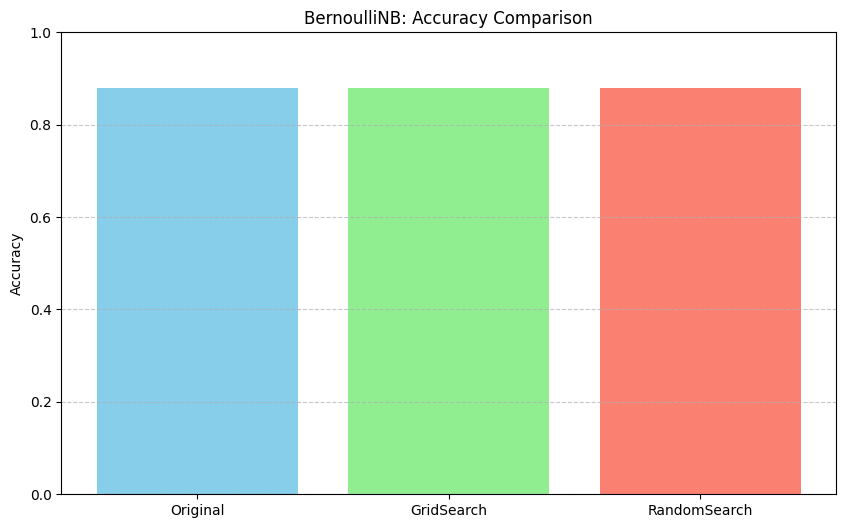

In [131]:
# Bar Plot to Compare Accuracy between all three approaches
plt.figure(figsize=(10, 6))
plt.bar(['Original', 'GridSearch', 'RandomSearch'],
        [original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy']],
        color=['skyblue', 'lightgreen', 'salmon'])
plt.title('BernoulliNB: Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [132]:
# Calculate Percentage Improvement for both methods
grid_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'GridSearch': [grid_metrics[k] for k in original_metrics],
    'Grid_Improvement (%)': [
        (grid_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

random_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'RandomSearch': [random_metrics[k] for k in original_metrics],
    'Random_Improvement (%)': [
        (random_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

grid_improvement_df = pd.DataFrame(grid_improvement)
random_improvement_df = pd.DataFrame(random_improvement)

print("\nGridSearch Improvement Summary:")
print(grid_improvement_df)

print("\nRandomSearch Improvement Summary:")
print(random_improvement_df)


GridSearch Improvement Summary:
      Metric  Original  GridSearch  Grid_Improvement (%)
0   Accuracy  0.880000    0.880000                   0.0
1  Precision  0.880597    0.880597                   0.0
2   F1-Score  0.879953    0.879953                   0.0
3        MCC  0.760597    0.760597                   0.0
4      Kappa  0.760000    0.760000                   0.0

RandomSearch Improvement Summary:
      Metric  Original  RandomSearch  Random_Improvement (%)
0   Accuracy  0.880000      0.880000                     0.0
1  Precision  0.880597      0.880597                     0.0
2   F1-Score  0.879953      0.879953                     0.0
3        MCC  0.760597      0.760597                     0.0
4      Kappa  0.760000      0.760000                     0.0


In [133]:
# Analyze CV results to understand parameter importance
grid_results = pd.DataFrame(grid_search_nb.cv_results_)
random_results = pd.DataFrame(random_search_nb.cv_results_)

# Look at top 5 parameter combinations from each search method
#print("\nTop 5 GridSearch parameter combinations:")
# Access mean_test_f1 since refit='f1' was used in GridSearchCV
top_grid = grid_results.sort_values('mean_test_f1', ascending=False).head(5)
#print(top_grid[['params', 'mean_test_f1', 'std_test_f1']])

#print("\nTop 5 RandomSearch parameter combinations:")
# Access mean_test_f1 since refit='f1' was used in RandomizedSearchCV
top_random = random_results.sort_values('mean_test_f1', ascending=False).head(5)
#print(top_random[['params', 'mean_test_f1', 'std_test_f1']])

# Final conclusion
print("\nConclusion:")
best_accuracy = max(original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy'])
best_method = ["Original", "GridSearch", "RandomSearch"][
    np.argmax([original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy']])
]

if best_method != "Original":
    best_params = grid_search_nb.best_params_ if best_method == "GridSearch" else random_search_nb.best_params_
    improvement_pct = (best_accuracy - original_metrics['Accuracy']) / original_metrics['Accuracy'] * 100
    print(f"Hyperparameter tuning with {best_method} improved accuracy by {improvement_pct:.2f}%")
    print(f"Best parameters: {best_params}")
else:
    print("Original model performed best. Consider expanding parameter search space or trying different techniques.")


Conclusion:
Original model performed best. Consider expanding parameter search space or trying different techniques.


## HYPERPARAMETER TUNING - XGBOOST CLASSIFIER

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to Compute Metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

# Train Original XGBoost Model with default parameters
original_xgb = XGBClassifier(random_state=42, n_jobs=-1)
original_xgb.fit(X_train, y_train)
y_pred_original = original_xgb.predict(X_test)
original_metrics = calculate_metrics(y_test, y_pred_original)

In [83]:
# XGBoost Grid Search - Focus on key parameters for efficiency
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3]
}

grid_search_xgb = GridSearchCV(
    XGBClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,  # Reduced folds to save computation time for large models
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='accuracy',  # Optimize for accuracy as requested
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search_xgb.fit(X_train, y_train)

# Get best model from GridSearch
best_grid_xgb = grid_search_xgb.best_estimator_
y_pred_grid = best_grid_xgb.predict(X_test)
grid_metrics = calculate_metrics(y_test, y_pred_grid)

print(f"Best Parameters from GridSearch: {grid_search_xgb.best_params_}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters from GridSearch: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


In [84]:
# XGBoost Random Search - Wider parameter space for exploration
param_dist = {
    'learning_rate': np.logspace(-3, 0, num=20),  # From 0.001 to 1.0
    'max_depth': np.arange(3, 12, dtype=int),
    'n_estimators': np.arange(50, 251, 10, dtype=int),
    'subsample': np.linspace(0.6, 1.0, 3),
    'colsample_bytree': np.linspace(0.6, 1.0, 3),
    'min_child_weight': np.arange(1, 4, dtype=int),
    'gamma': np.linspace(0, 0.5, 6),
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

random_search_xgb = RandomizedSearchCV(
    XGBClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=25,  # Reduced iterations but still broad coverage
    cv=3,  # Reduced folds to save computation time
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='accuracy',  # Optimize for accuracy
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

random_search_xgb.fit(X_train, y_train)

# Get best model from RandomSearch
best_random_xgb = random_search_xgb.best_estimator_
y_pred_random = best_random_xgb.predict(X_test)
random_metrics = calculate_metrics(y_test, y_pred_random)

print(f"Best Parameters from Random Search: {random_search_xgb.best_params_}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters from Random Search: {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 210, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.008858667904100823, 'gamma': 0.2, 'colsample_bytree': 0.8}



Performance Comparison for XGBoost:
           Original  GridSearch  RandomSearch
Accuracy   0.879700    0.880400      0.880400
Precision  0.879705    0.880407      0.880407
F1-Score   0.879700    0.880399      0.880399
MCC        0.759405    0.760807      0.760807
Kappa      0.759400    0.760800      0.760800


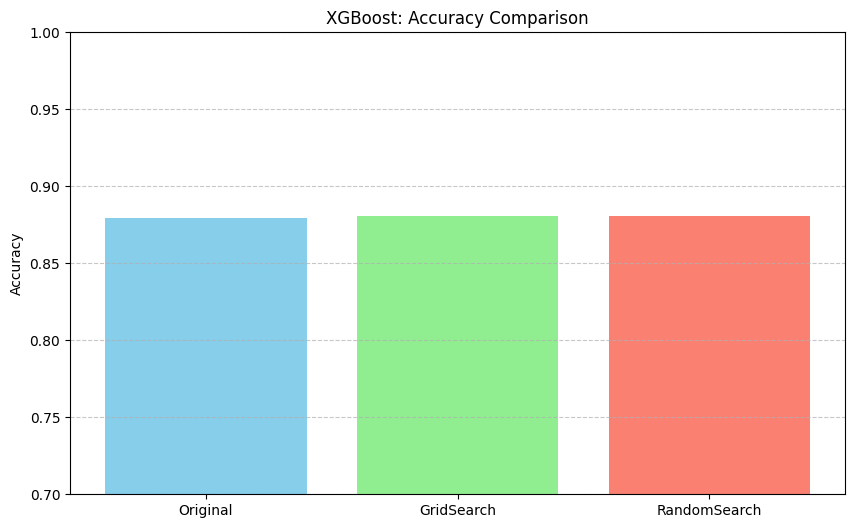


GridSearch Improvement Summary:
      Metric  Original  GridSearch  Grid_Improvement (%)
0   Accuracy  0.879700    0.880400              0.079573
1  Precision  0.879705    0.880407              0.079786
2   F1-Score  0.879700    0.880399              0.079556
3        MCC  0.759405    0.760807              0.184603
4      Kappa  0.759400    0.760800              0.184356

RandomSearch Improvement Summary:
      Metric  Original  RandomSearch  Random_Improvement (%)
0   Accuracy  0.879700      0.880400                0.079573
1  Precision  0.879705      0.880407                0.079786
2   F1-Score  0.879700      0.880399                0.079556
3        MCC  0.759405      0.760807                0.184603
4      Kappa  0.759400      0.760800                0.184356


In [85]:
# Convert to DataFrame for Comparison (three models)
results_df = pd.DataFrame({
    'Original': original_metrics,
    'GridSearch': grid_metrics,
    'RandomSearch': random_metrics
})

# Display Results
print("\nPerformance Comparison for XGBoost:")
print(results_df)

# Bar Plot to Compare Accuracy between all three approaches
plt.figure(figsize=(10, 6))
plt.bar(['Original', 'GridSearch', 'RandomSearch'],
        [original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy']],
        color=['skyblue', 'lightgreen', 'salmon'])
plt.title('XGBoost: Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Adjusted y-limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate Percentage Improvement for both methods
grid_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'GridSearch': [grid_metrics[k] for k in original_metrics],
    'Grid_Improvement (%)': [
        (grid_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

random_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'RandomSearch': [random_metrics[k] for k in original_metrics],
    'Random_Improvement (%)': [
        (random_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

grid_improvement_df = pd.DataFrame(grid_improvement)
random_improvement_df = pd.DataFrame(random_improvement)

print("\nGridSearch Improvement Summary:")
print(grid_improvement_df)

print("\nRandomSearch Improvement Summary:")
print(random_improvement_df)


Top 5 GridSearch parameter combinations:
                                                params  mean_test_accuracy  \
215  {'colsample_bytree': 1.0, 'learning_rate': 0.1...             0.87830   
143  {'colsample_bytree': 0.9, 'learning_rate': 0.1...             0.87830   
71   {'colsample_bytree': 0.8, 'learning_rate': 0.1...             0.87830   
101  {'colsample_bytree': 0.9, 'learning_rate': 0.0...             0.87825   
35   {'colsample_bytree': 0.8, 'learning_rate': 0.0...             0.87825   

     std_test_accuracy  
215           0.001682  
143           0.001682  
71            0.001682  
101           0.001639  
35            0.001639  

Top 5 RandomSearch parameter combinations:
                                               params  mean_test_accuracy  \
8   {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...             0.87825   
18  {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha...             0.87810   
24  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...           

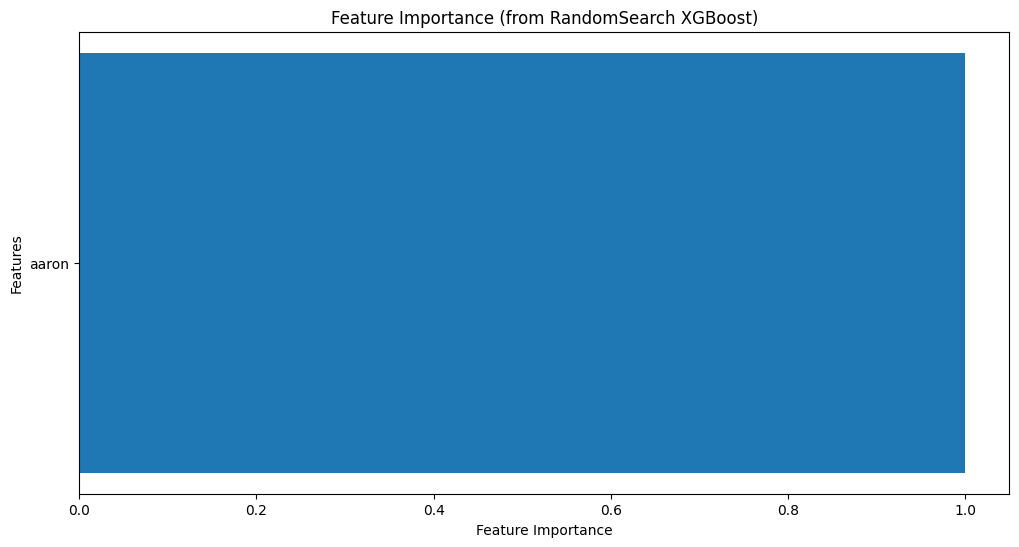

In [87]:
# Analyze CV results to understand parameter importance
grid_results = pd.DataFrame(grid_search_xgb.cv_results_)
random_results = pd.DataFrame(random_search_xgb.cv_results_)

# Look at top 5 parameter combinations from each search method
print("\nTop 5 GridSearch parameter combinations:")
# Access mean_test_accuracy since refit='accuracy' was used in GridSearchCV
top_grid = grid_results.sort_values('mean_test_accuracy', ascending=False).head(5)
print(top_grid[['params', 'mean_test_accuracy', 'std_test_accuracy']])

print("\nTop 5 RandomSearch parameter combinations:")
# Access mean_test_accuracy since refit='accuracy' was used in RandomizedSearchCV
top_random = random_results.sort_values('mean_test_accuracy', ascending=False).head(5)
print(top_random[['params', 'mean_test_accuracy', 'std_test_accuracy']])

# Feature importance analysis (XGBoost specific)
plt.figure(figsize=(12, 6))
plt.title('Feature Importance from Best XGBoost Model')
# Choose the model with highest accuracy
if grid_metrics['Accuracy'] > random_metrics['Accuracy']:
    best_model = best_grid_xgb
    model_name = "GridSearch"
else:
    best_model = best_random_xgb
    model_name = "RandomSearch"

# Plot feature importance
feature_importance = best_model.feature_importances_
# Change: Get feature names from the vectorizer instead of X_train
feature_names = vectorizer.get_feature_names_out()  # Assuming 'vectorizer' is defined earlier
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Feature Importance (from {model_name} XGBoost)')
plt.show()

In [88]:
# Calculate percentage improvement for both tuning methods
random_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'RandomSearch': [random_metrics[k] for k in original_metrics],
    'Random_Improvement (%)': [
        (random_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

grid_improvement = {
    'Metric': list(original_metrics.keys()),
    'Original': [original_metrics[k] for k in original_metrics],
    'GridSearch': [grid_metrics[k] for k in original_metrics],
    'Grid_Improvement (%)': [
        (grid_metrics[k] - original_metrics[k]) / original_metrics[k] * 100
        for k in original_metrics
    ]
}

random_improvement_df = pd.DataFrame(random_improvement)
grid_improvement_df = pd.DataFrame(grid_improvement)

print("\nRandomSearch Improvement Summary:")
print(random_improvement_df)

print("\nGridSearch Improvement Summary:")
print(grid_improvement_df)


RandomSearch Improvement Summary:
      Metric  Original  RandomSearch  Random_Improvement (%)
0   Accuracy  0.879700      0.880400                0.079573
1  Precision  0.879705      0.880407                0.079786
2   F1-Score  0.879700      0.880399                0.079556
3        MCC  0.759405      0.760807                0.184603
4      Kappa  0.759400      0.760800                0.184356

GridSearch Improvement Summary:
      Metric  Original  GridSearch  Grid_Improvement (%)
0   Accuracy  0.879700    0.880400              0.079573
1  Precision  0.879705    0.880407              0.079786
2   F1-Score  0.879700    0.880399              0.079556
3        MCC  0.759405    0.760807              0.184603
4      Kappa  0.759400    0.760800              0.184356


In [91]:
print("\nConclusion:")

best_accuracy = max(original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy'])
best_method = ["Original", "GridSearch", "RandomSearch"][
    np.argmax([original_metrics['Accuracy'], grid_metrics['Accuracy'], random_metrics['Accuracy']])
]

print(f"The best performing XGBoost model was achieved using {best_method} with an accuracy of {best_accuracy:.4f}.")


Conclusion:
The best performing XGBoost model was achieved using GridSearch with an accuracy of 0.8804.


## HYPERPARAMETER TUNING - ADABOOST

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score
import pandas as pd
import numpy as np

# Define AdaBoost Model with Decision Tree Base Estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Improved Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Use Stratified K-Fold for Balanced Splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Grid Search ----
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_adaboost_grid = grid_search.best_estimator_

print("Best Parameters from GridSearch:", grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters from GridSearch: {'algorithm': 'SAMME', 'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 150}


In [115]:
# Expanded Hyperparameter Distribution for Randomized Search
param_dist = {
    'n_estimators': np.arange(50, 501, 50),  # More fine-grained
    'learning_rate': np.logspace(-3, 0, 20),  # Log scale for better search
    'algorithm': ['SAMME', 'SAMME.R']
}

# ---- Randomized Search ----
random_search = RandomizedSearchCV(
    adaboost, param_distributions=param_dist, n_iter=20, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)
best_adaboost_random = random_search.best_estimator_

print("Best Parameters from RandomSearch:", random_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters from RandomSearch: {'n_estimators': 350, 'learning_rate': 0.006158482110660267, 'algorithm': 'SAMME'}


In [116]:
# --- Performance Comparison ---
original_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
original_model.fit(X_train, y_train)

y_pred_original = original_model.predict(X_test)
y_pred_tuned_grid = best_adaboost_grid.predict(X_test)
y_pred_tuned_random = best_adaboost_random.predict(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

original_metrics = calculate_metrics(y_test, y_pred_original)
tuned_metrics_grid = calculate_metrics(y_test, y_pred_tuned_grid)
tuned_metrics_random = calculate_metrics(y_test, y_pred_tuned_random)

# Print comparison
results_df = pd.DataFrame({'Original': original_metrics, 'GridSearch': tuned_metrics_grid, 'RandomSearch': tuned_metrics_random})
print("\nPerformance Comparison:")
print(results_df)


Performance Comparison:
           Original  GridSearch  RandomSearch
Accuracy   0.879200    0.880700      0.879200
Precision  0.879255    0.880711      0.879255
F1-Score   0.879196    0.880699      0.879196
MCC        0.758455    0.761411      0.758455
Kappa      0.758400    0.761400      0.758400


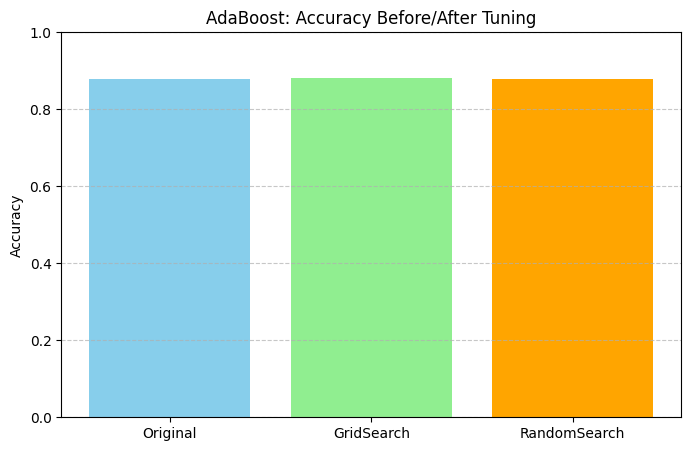

In [117]:
import matplotlib.pyplot as plt

# --- Visualization (Accuracy Bar Plot) ---
plt.figure(figsize=(8, 5))
plt.bar(['Original', 'GridSearch', 'RandomSearch'],
        [original_metrics['Accuracy'], tuned_metrics_grid['Accuracy'], tuned_metrics_random['Accuracy']],
        color=['skyblue', 'lightgreen', 'orange'])
plt.title('AdaBoost: Accuracy Before/After Tuning')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [118]:
# --- Improvement Table ---
improvement = {
    'Metric': ['Accuracy', 'Precision', 'F1-Score', 'MCC', 'Kappa'],
    'Original': [original_metrics[k] for k in original_metrics],
    'GridSearch': [tuned_metrics_grid[k] for k in original_metrics],
    'RandomSearch': [tuned_metrics_random[k] for k in original_metrics],
    'GridSearch Improvement (%)': [
        (tuned_metrics_grid[k] - original_metrics[k]) / original_metrics[k] * 100 for k in original_metrics
    ],
    'RandomSearch Improvement (%)': [
        (tuned_metrics_random[k] - original_metrics[k]) / original_metrics[k] * 100 for k in original_metrics
    ]
}
improvement_df = pd.DataFrame(improvement)
print("\nImprovement Summary:")
print(improvement_df)


Improvement Summary:
      Metric  Original  GridSearch  RandomSearch  GridSearch Improvement (%)  \
0   Accuracy  0.879200    0.880700      0.879200                    0.170610   
1  Precision  0.879255    0.880711      0.879255                    0.165650   
2   F1-Score  0.879196    0.880699      0.879196                    0.171006   
3        MCC  0.758455    0.761411      0.758455                    0.389805   
4      Kappa  0.758400    0.761400      0.758400                    0.395570   

   RandomSearch Improvement (%)  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  


In [119]:
# --- Conclusion ---
print("\nConclusion:")
grid_improvement = (tuned_metrics_grid['Accuracy'] - original_metrics['Accuracy']) / original_metrics['Accuracy'] * 100
random_improvement = (tuned_metrics_random['Accuracy'] - original_metrics['Accuracy']) / original_metrics['Accuracy'] * 100

if grid_improvement > random_improvement and grid_improvement > 0:
    print(f"GridSearchCV improved accuracy by {grid_improvement:.2f}%")
    print(f"Best parameters (GridSearch): {grid_search.best_params_}")
elif random_improvement > 0:
    print(f"RandomSearchCV improved accuracy by {random_improvement:.2f}%")
    print(f"Best parameters (RandomSearch): {random_search.best_params_}")
else:
    print("No improvement observed after tuning.")


Conclusion:
GridSearchCV improved accuracy by 0.17%
Best parameters (GridSearch): {'algorithm': 'SAMME', 'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 150}
